In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

1. Checking for null values

In [7]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

**since county column is not having any data, we will drop the column**


In [8]:
df.drop('county',axis=1,inplace=True)

**Dropping unnecessary cols like long, lat**

**Since the columns ['id','url','region_url','image_url','lat','long'] do not have any useful info for the price prediction, we are removing them also.**

In [9]:
df.drop(['id','url','region_url','image_url','lat','long'], axis=1, inplace=True)

In [10]:
df.isna().sum() / df.shape[0] * 100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
description      0.016398
state            0.000000
posting_date     0.015930
dtype: float64

**As we got the percentage null values in each column, we will drop null values for columns with less percentage of null values. For others we will replace the null with uncharted.**

In [11]:
df.dropna(subset=['year','manufacturer','model','fuel','odometer','title_status','transmission','description','posting_date'],inplace=True)

In [12]:
df.fillna('uncharted', inplace=True)
df.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
description     0
state           0
posting_date    0
dtype: int64

**Dropping duplicate rows**

In [13]:
df.duplicated().sum()

9

In [14]:
df = df.drop_duplicates().reset_index().drop('index',axis=1)

**Converting all the string characters to lower case**

In [15]:
for col in df.select_dtypes('object').columns:
  df[col] = df[col].apply(lambda x: x.lower())

**Checking for unique values in each columns**

In [16]:
df['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'sf bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [17]:
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'ferrari', 'mini', 'pontiac',
       'fiat', 'rover', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover'], dtype=object)

In [18]:
df['condition'].value_counts()

uncharted    157271
good         115016
excellent     89762
like new      19970
fair           5918
new            1124
salvage         532
Name: condition, dtype: int64

In [19]:
df['fuel'].value_counts()

gas         329670
other        28429
diesel       24970
hybrid        4962
electric      1562
Name: fuel, dtype: int64

In [20]:
df['title_status'].value_counts()

clean         377127
rebuilt         6826
salvage         3625
lien            1319
missing          558
parts only       138
Name: title_status, dtype: int64

In [21]:
df['transmission'].value_counts()

automatic    309249
other         59376
manual        20968
Name: transmission, dtype: int64

In [22]:
df['VIN'].value_counts()

uncharted            145861
1fmju1jt1hea52352       261
3c6jr6dt3kg560649       235
1fter1eh1lla36301       231
5tftx4cn3ex042751       227
                      ...  
sadcl2gx6ka369448         1
5xxgm4a77fg364624         1
2fmdk3j96dba97263         1
1gcvkpec9jz183102         1
sajgx2749vcoo8376         1
Name: VIN, Length: 108381, dtype: int64

In [23]:
df['drive'].value_counts()

4wd          123512
uncharted    115074
fwd           98670
rwd           52337
Name: drive, dtype: int64

In [24]:
df['size'].value_counts()

uncharted      277321
full-size       59109
mid-size        32869
compact         17466
sub-compact      2828
Name: size, dtype: int64

In [25]:
df['type'].value_counts()

uncharted      82627
sedan          80974
suv            71575
pickup         40933
truck          32031
other          19442
coupe          17109
hatchback      14998
wagon          10095
van             7518
convertible     6884
mini-van        4553
offroad          549
bus              305
Name: type, dtype: int64

In [26]:
df['paint_color'].value_counts()

uncharted    112492
white         73224
black         59591
silver        40770
blue          29289
red           28090
grey          23093
green          6534
brown          6262
custom         6174
orange         1757
yellow         1721
purple          596
Name: paint_color, dtype: int64

In [27]:
df['state'].value_counts()

ca    45131
fl    25790
tx    21212
ny    18197
oh    16133
or    15750
mi    15195
nc    13696
pa    12501
wa    11988
wi    10566
tn    10223
co    10024
va     9946
il     9558
nj     8842
id     8549
az     7936
ia     7555
ma     7542
mn     7280
ga     6439
ok     6286
ks     5799
mt     5742
sc     5714
in     5363
ct     4700
md     4476
al     4444
mo     4092
nm     4081
ky     3909
ar     3798
ak     3316
la     2909
nv     2884
nh     2803
dc     2749
me     2746
hi     2534
vt     2345
ri     2056
sd     1203
ut     1036
wv      975
ms      906
de      887
ne      866
wy      558
nd      363
Name: state, dtype: int64

In [28]:
df['cylinders'].value_counts()

uncharted       161342
6 cylinders      86753
4 cylinders      71113
8 cylinders      66131
5 cylinders       1524
10 cylinders      1302
other              800
3 cylinders        520
12 cylinders       108
Name: cylinders, dtype: int64

In [29]:
df['manufacturer'].value_counts()

ford               67808
chevrolet          52325
toyota             32507
honda              20407
jeep               18149
nissan             18053
ram                16769
gmc                15940
bmw                14224
dodge              12864
mercedes-benz      11195
hyundai             9872
subaru              9159
volkswagen          9025
kia                 8120
lexus               7907
audi                7322
cadillac            6555
acura               5807
chrysler            5699
buick               5290
mazda               5193
infiniti            4679
lincoln             4019
volvo               3221
mitsubishi          3096
mini                2287
pontiac             2195
jaguar              1892
rover               1752
porsche             1294
mercury             1145
saturn              1044
alfa-romeo           887
tesla                818
fiat                 768
harley-davidson      124
ferrari               75
datsun                62
aston-martin          24


**For categorical columns, we are clubbing the rare values into one**

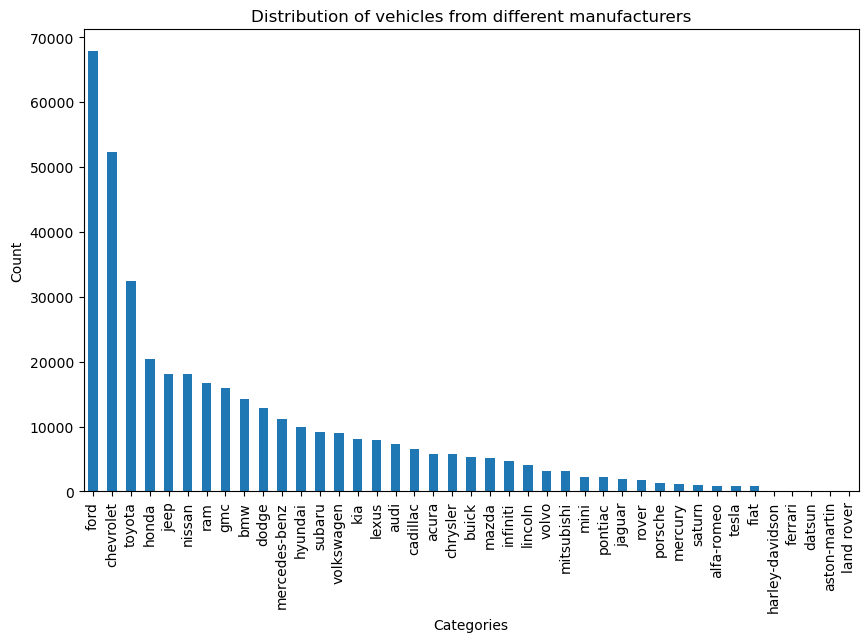

In [30]:
value_counts = df['manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of vehicles from different manufacturers')
plt.xticks(rotation=90)
plt.show()

For **manufacturer** we will take only the top 20 unique values with high value counts. All others will be considered as a single type other

In [31]:
df['manufacturer'] = df['manufacturer'].apply(lambda x:x if str(x) in value_counts[:20] else 'other' )

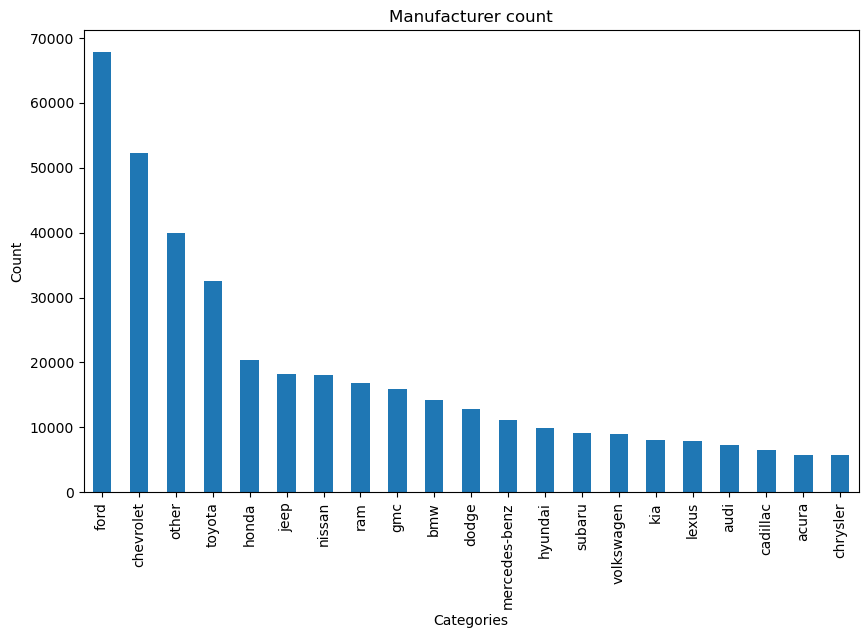

In [32]:
value_counts = df['manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Manufacturer count')
plt.xticks(rotation=90)
plt.show()

**Before handling the region column, we can see the distribution below**

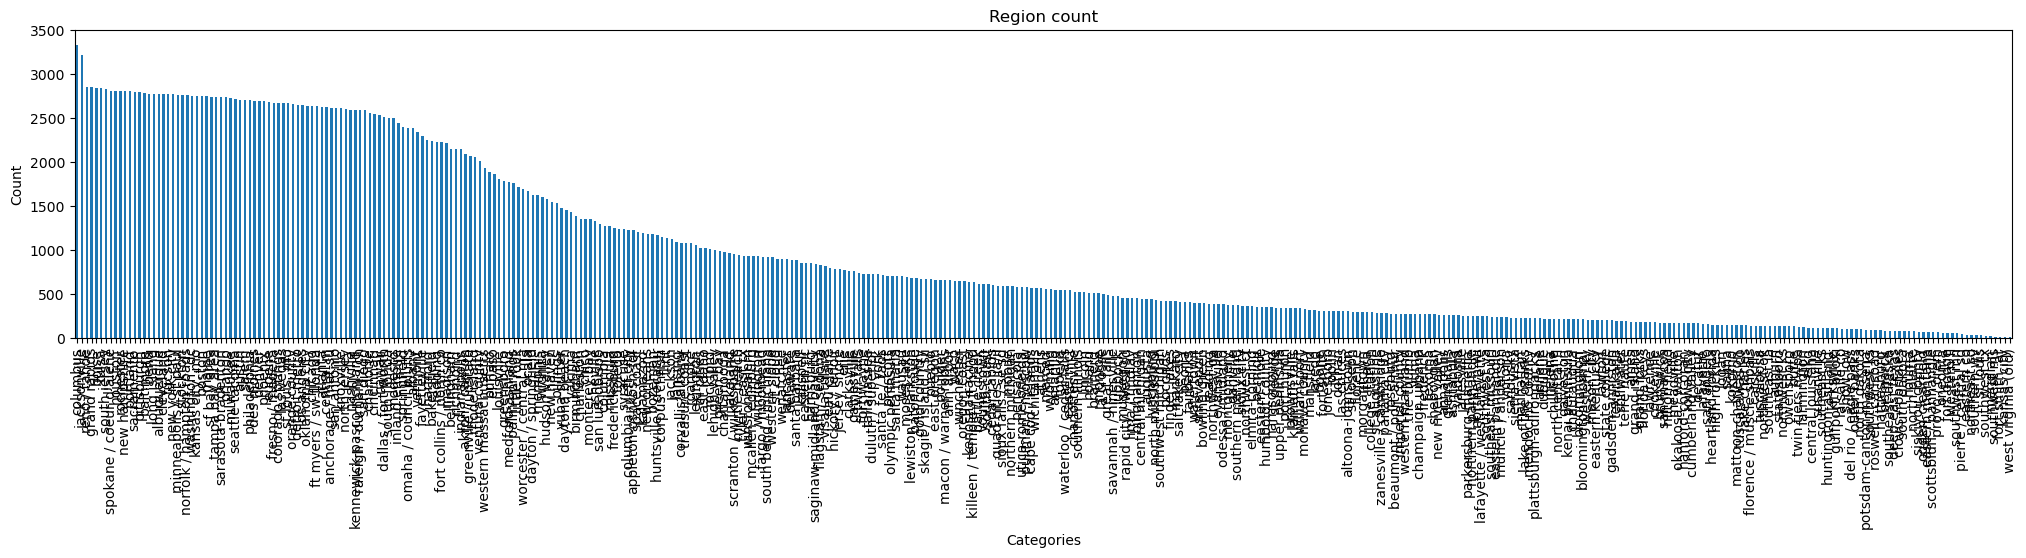

In [33]:
region_counts = df['region'].value_counts()

plt.figure(figsize=(25,4))
region_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Region count')
plt.xticks(rotation=90)
plt.show()

For **region** we will take only the top 50 unique values with high value counts. All others will be considered as a single type other

In [34]:
df['region'] = df['region'].apply(lambda x:x if str(x) in region_counts[:50] else 'other')

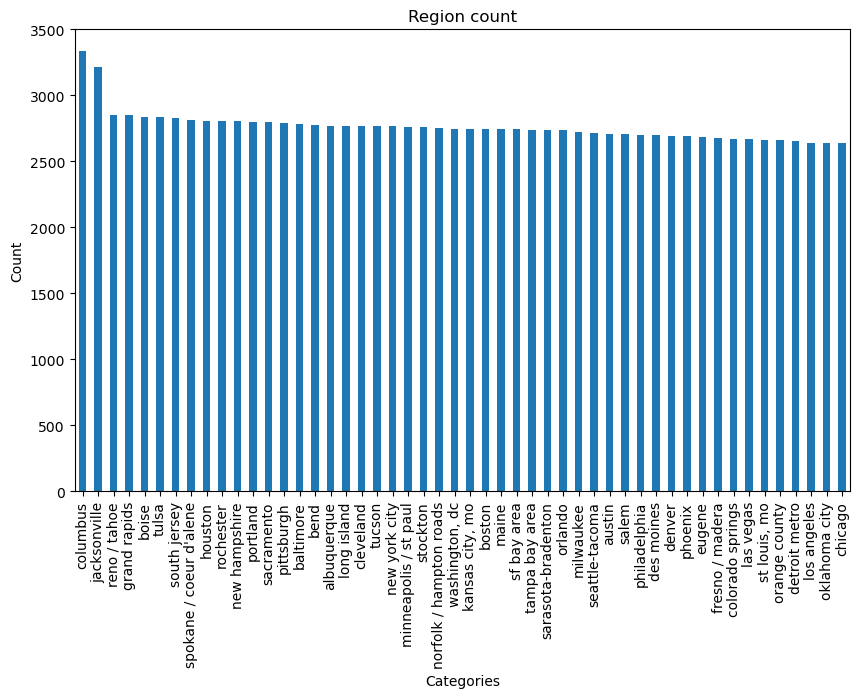

In [35]:
region_counts = df['region'].value_counts()[1:]

plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Region count')
plt.xticks(rotation=90)
plt.show()

In [36]:
model_counts = df['model'].value_counts()
df['model'].value_counts()

f-150                        7786
silverado 1500               4967
1500                         4145
camry                        3051
silverado                    2946
                             ... 
3 i gt                          1
f-150 xlt 4dr super crew        1
f-pace 30t r-sport suv 4d       1
25oo-hd crew                    1
gand wagoneer                   1
Name: model, Length: 21866, dtype: int64

For **model** we will take only the top 50 unique values with high value counts. All others will be considered as a single type other

In [37]:
df['model'] = df['model'].apply(lambda x:x if str(x) in model_counts[:50] else 'other')

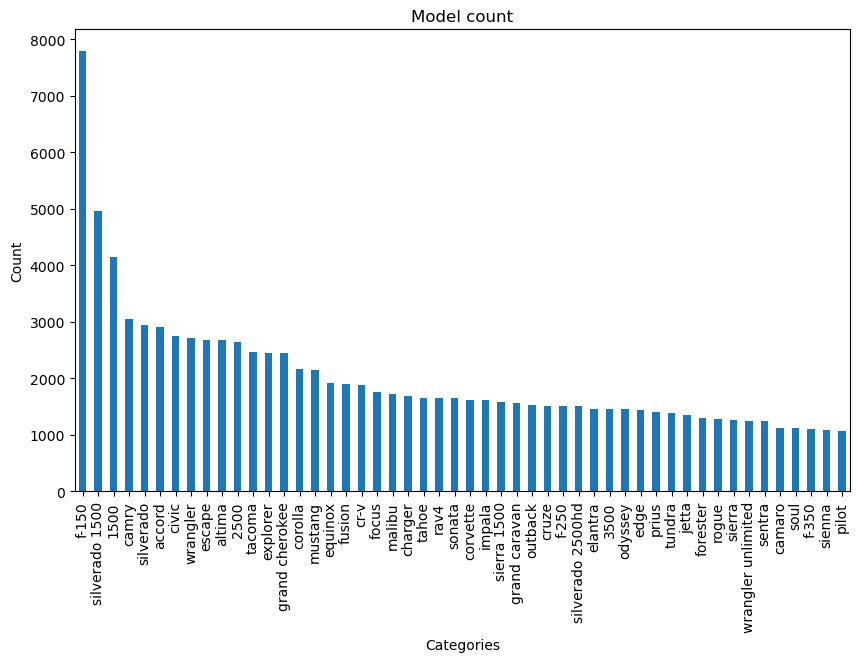

In [38]:
model_counts = df['model'].value_counts()[1:]

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Model count')
plt.xticks(rotation=90)
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389593 entries, 0 to 389592
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389593 non-null  object 
 1   price         389593 non-null  int64  
 2   year          389593 non-null  float64
 3   manufacturer  389593 non-null  object 
 4   model         389593 non-null  object 
 5   condition     389593 non-null  object 
 6   cylinders     389593 non-null  object 
 7   fuel          389593 non-null  object 
 8   odometer      389593 non-null  float64
 9   title_status  389593 non-null  object 
 10  transmission  389593 non-null  object 
 11  VIN           389593 non-null  object 
 12  drive         389593 non-null  object 
 13  size          389593 non-null  object 
 14  type          389593 non-null  object 
 15  paint_color   389593 non-null  object 
 16  description   389593 non-null  object 
 17  state         389593 non-null  object 
 18  post

**Removing outliers for numerical columns(year, price, odometer)**

/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/1191736858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

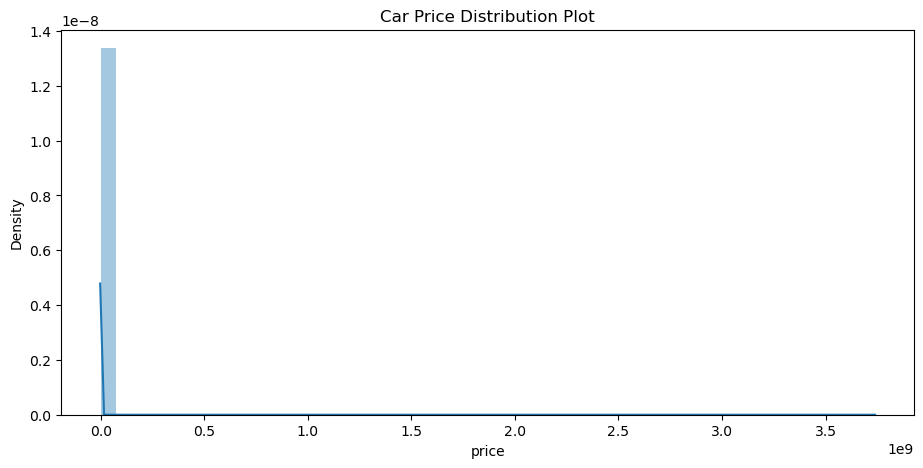

In [40]:
plt.figure(figsize=[11,5])
sns.distplot(df['price'])
plt.title('Car Price Distribution Plot')

In [41]:
col = 'price'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
filtered_df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]

/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/2489520295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df['price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

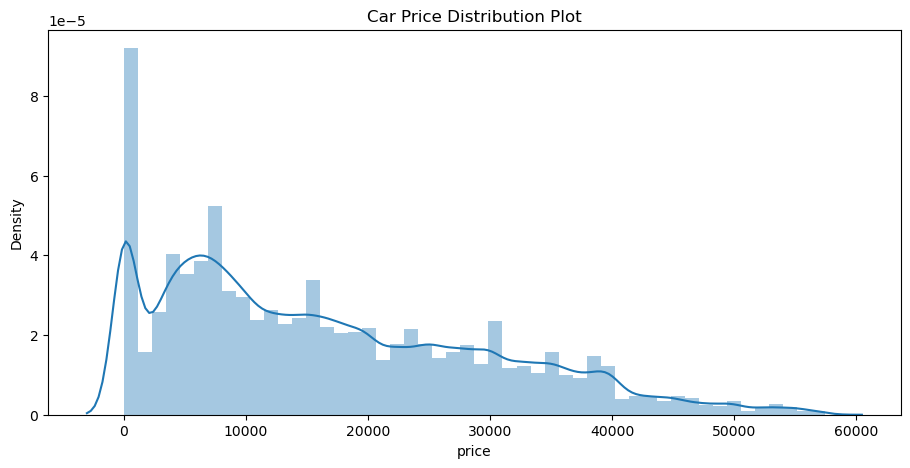

In [42]:
plt.figure(figsize=[11,5])
sns.distplot(filtered_df['price'])
plt.title('Car Price Distribution Plot')

/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/852298539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer'])


Text(0.5, 1.0, 'Car odometer value Distribution Plot')

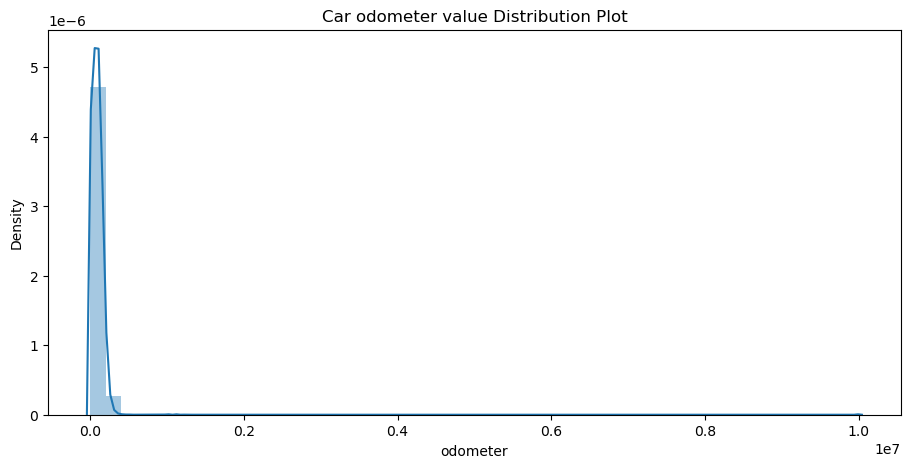

In [43]:
plt.figure(figsize=[11,5])
sns.distplot(df['odometer'])
plt.title('Car odometer value Distribution Plot')

In [44]:
col = 'odometer'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
filtered_df = filtered_df[(filtered_df[col] > lower_limit) & (filtered_df[col] < upper_limit)]


/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/2629437813.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df['odometer'])


Text(0.5, 1.0, 'Car odometer value Distribution Plot')

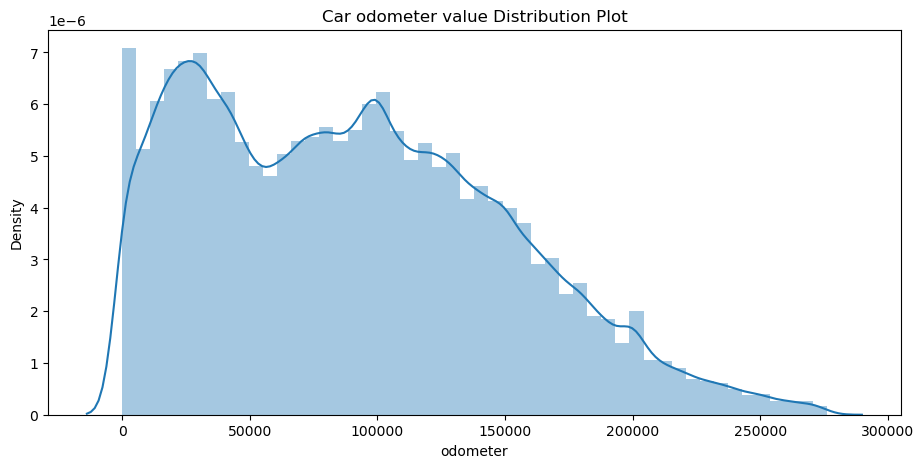

In [45]:
plt.figure(figsize=[11,5])
sns.distplot(filtered_df['odometer'])
plt.title('Car odometer value Distribution Plot')

/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/3367451705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])


Text(0.5, 1.0, 'Year Distribution Plot')

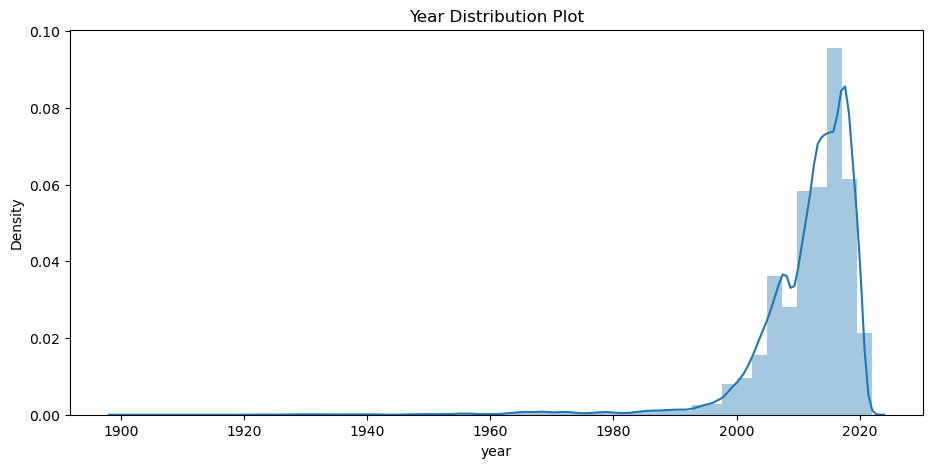

In [46]:
plt.figure(figsize=[11,5])
sns.distplot(df['year'])
plt.title('Year Distribution Plot')

In [47]:
col = 'year'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
filtered_df = filtered_df[(filtered_df[col] > lower_limit) & (filtered_df[col] < upper_limit)]


/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/499132855.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df['year'])


Text(0.5, 1.0, 'Year Distribution Plot')

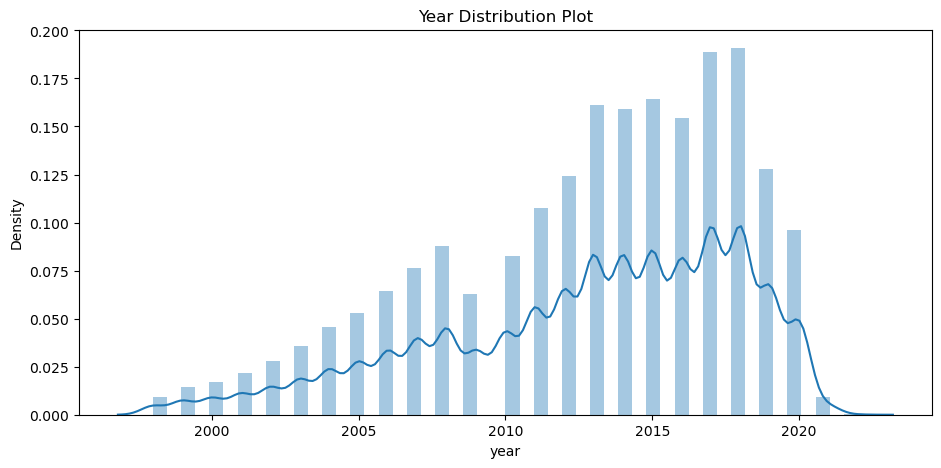

In [48]:
plt.figure(figsize=[11,5])
sns.distplot(filtered_df['year'])
plt.title('Year Distribution Plot')

In [49]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364912 entries, 0 to 389592
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        364912 non-null  object 
 1   price         364912 non-null  int64  
 2   year          364912 non-null  float64
 3   manufacturer  364912 non-null  object 
 4   model         364912 non-null  object 
 5   condition     364912 non-null  object 
 6   cylinders     364912 non-null  object 
 7   fuel          364912 non-null  object 
 8   odometer      364912 non-null  float64
 9   title_status  364912 non-null  object 
 10  transmission  364912 non-null  object 
 11  VIN           364912 non-null  object 
 12  drive         364912 non-null  object 
 13  size          364912 non-null  object 
 14  type          364912 non-null  object 
 15  paint_color   364912 non-null  object 
 16  description   364912 non-null  object 
 17  state         364912 non-null  object 
 18  post

**Correcting types for year and odometer**

In [50]:
filtered_df['year'] = filtered_df.year.astype('int')
filtered_df['odometer'] = filtered_df.odometer.astype('int')

In [51]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364912 entries, 0 to 389592
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        364912 non-null  object
 1   price         364912 non-null  int64 
 2   year          364912 non-null  int64 
 3   manufacturer  364912 non-null  object
 4   model         364912 non-null  object
 5   condition     364912 non-null  object
 6   cylinders     364912 non-null  object
 7   fuel          364912 non-null  object
 8   odometer      364912 non-null  int64 
 9   title_status  364912 non-null  object
 10  transmission  364912 non-null  object
 11  VIN           364912 non-null  object
 12  drive         364912 non-null  object
 13  size          364912 non-null  object
 14  type          364912 non-null  object
 15  paint_color   364912 non-null  object
 16  description   364912 non-null  object
 17  state         364912 non-null  object
 18  posting_date  364912 non

**Feature engineering: Creating a new column “Age” which tells how old a car is**

In [52]:
import datetime
current_year = datetime.datetime.now().year
filtered_df['age'] = current_year - filtered_df['year']

Will drop the vehicle details with age greater than 20 since they won't be outdated for our analysis

In [53]:
filtered_df = filtered_df.drop(filtered_df[filtered_df['age'] > 20].index,axis=0).reset_index().drop('index',axis=1).copy()

**Creating “posted ago” column using posted date column**

In [54]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

def difference_in_months(strdate):
  strdate = strdate.split('t')[0]
  current_date = datetime.now()
  current_date = current_date.strftime("%Y-%m-%d")


  current_date = datetime.strptime(current_date, "%Y-%m-%d")
  posting_date = datetime.strptime(strdate, "%Y-%m-%d")
  difference_in_months = relativedelta(current_date, posting_date).years * 12 + relativedelta(current_date, posting_date).months
  return difference_in_months

filtered_df['posted_ago_in_months'] = filtered_df['posting_date'].apply(difference_in_months)
filtered_df.drop('posting_date',axis=1,inplace=True)

Checking for duplicate entries with VIN. VIN is unique for each car. We have found that some VINs are having muliple entries. We will remove them

In [55]:
filtered_df['VIN'].value_counts()

uncharted            118605
1fmju1jt1hea52352       261
3c6jr6dt3kg560649       235
1fter1eh1lla36301       231
5tftx4cn3ex042751       227
                      ...  
1n4al11d16c145743         1
5y2sl638x5z438175         1
1c6rr7lt2es227589         1
wdcgg8jbxdg143201         1
1fdwf37p64ea24868         1
Name: VIN, Length: 101152, dtype: int64

In [56]:
new_filtered_df = filtered_df.drop_duplicates(subset='VIN', keep='first').reset_index().drop('index',axis=1)

In [57]:
new_filtered_df.drop('VIN', axis=1, inplace=True)

**String to int conversion for column cylinder**

In [58]:
def extractingIntegers(cylinders):
  if cylinders != 'uncharted' and cylinders != 'other':
    return int(cylinders.split(' ')[0])
  else:
    return 0
new_filtered_df['cylinders'] = new_filtered_df['cylinders'].apply(extractingIntegers)

**Description feature handling**:
We will create a new feature from this desription column by doing sentiment analysis of the description. The new feature will indicate whether the description is positive, negative or neutral in nature.

In [59]:
import nltk
import re
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

nltk.download('opinion_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/gokulp/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gokulp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gokulp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gokulp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Methods to remove any urls, numbers or special characters from the description column

In [60]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

In [61]:
new_filtered_df['description'] = new_filtered_df['description'].apply(remove_special_characters)
new_filtered_df['description'] = new_filtered_df['description'].apply(remove_numbers)
new_filtered_df['description'] = new_filtered_df['description'].apply(remove_urls)

Segregating description into negative words count and positive words count to get the sentiment of the description

In [62]:
# Extract positive words method gives the count of number of positive words found the in description
positive_words = set(opinion_lexicon.positive())
def extract_positive_words(text):
    words = word_tokenize(text)  # Tokenize the text into words
    positive_words_found = [word for word in words if word in positive_words]
    return len(positive_words_found)


# Extract negative words method gives the count of number of negative words found the in description
negative_words = set(opinion_lexicon.negative())

# Method to extract negative words from a text
def extract_negative_words(text):
    words = word_tokenize(text)  # Tokenizing text into words
    negative_words_found = [word for word in words if word in negative_words]
    return len(negative_words_found)

In [63]:
# Method to classify descriptions as positive, negative, or neutral
def classify_sentiment(row):
    if row['positive_words'] > row['negative_words']:
        return 'Positive'
    elif row['positive_words'] < row['positive_words']:
        return 'Negative'
    else:
        return 'Neutral'

Performed sentiment analysis on the dataset by dividing it into four equal parts to avoid memory issues.

In [64]:
total_rows = len(new_filtered_df)

# Calculate the number of rows for each subset
subset_size = total_rows // 4

# Divide the dataset into four equal subsets
subset1 = new_filtered_df.iloc[:subset_size].copy()
subset2 = new_filtered_df.iloc[subset_size: 2 * subset_size].copy()
subset3 = new_filtered_df.iloc[2 * subset_size: 3 * subset_size].copy()
subset4 = new_filtered_df.iloc[3 * subset_size:].copy()

In [65]:
subset1['positive_words'] = subset1['description'].apply(extract_positive_words)
subset1['negative_words'] = subset1['description'].apply(extract_negative_words)
subset1['sentiment'] = subset1.apply(classify_sentiment, axis=1)

In [66]:
subset2['positive_words'] = subset2['description'].apply(extract_positive_words)
subset2['negative_words'] = subset2['description'].apply(extract_negative_words)
subset2['sentiment'] = subset2.apply(classify_sentiment, axis=1)

In [67]:
subset3['positive_words'] = subset3['description'].apply(extract_positive_words)
subset3['negative_words'] = subset3['description'].apply(extract_negative_words)
subset3['sentiment'] = subset3.apply(classify_sentiment, axis=1)

Merging all the subsets into single dataset

In [68]:
final_df = pd.concat([subset1, subset2,subset3,subset4], ignore_index=True)
final_df.drop('description',axis=1,inplace=True)

In [77]:
new_filtered_df = final_df.copy()

Label Encoding: Getting dummy features from the categorical features

In [78]:
final_df = pd.get_dummies(data=final_df)

In [86]:
final_df.head()

,price,year,cylinders,odometer,age,posted_ago_in_months,positive_words,negative_words,region_austin,region_baltimore,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,sentiment_Positive
0,33590,2014,8,57923,9,29,18.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22590,2010,8,71229,13,29,18.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39590,2020,8,19160,3,29,18.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,30990,2017,8,41124,6,29,17.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15000,2013,6,128000,10,29,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


Scaling Features

In [82]:
# First transforming features using Log transform, which handles skewed data.
X = final_df.drop('price',axis=1)
y = final_df['price']
X_log_transformed = np.log1p(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_log_transformed)

In [87]:
scaled_X.shape, y.shape

((101152, 227), (101152,))

### Visualizations

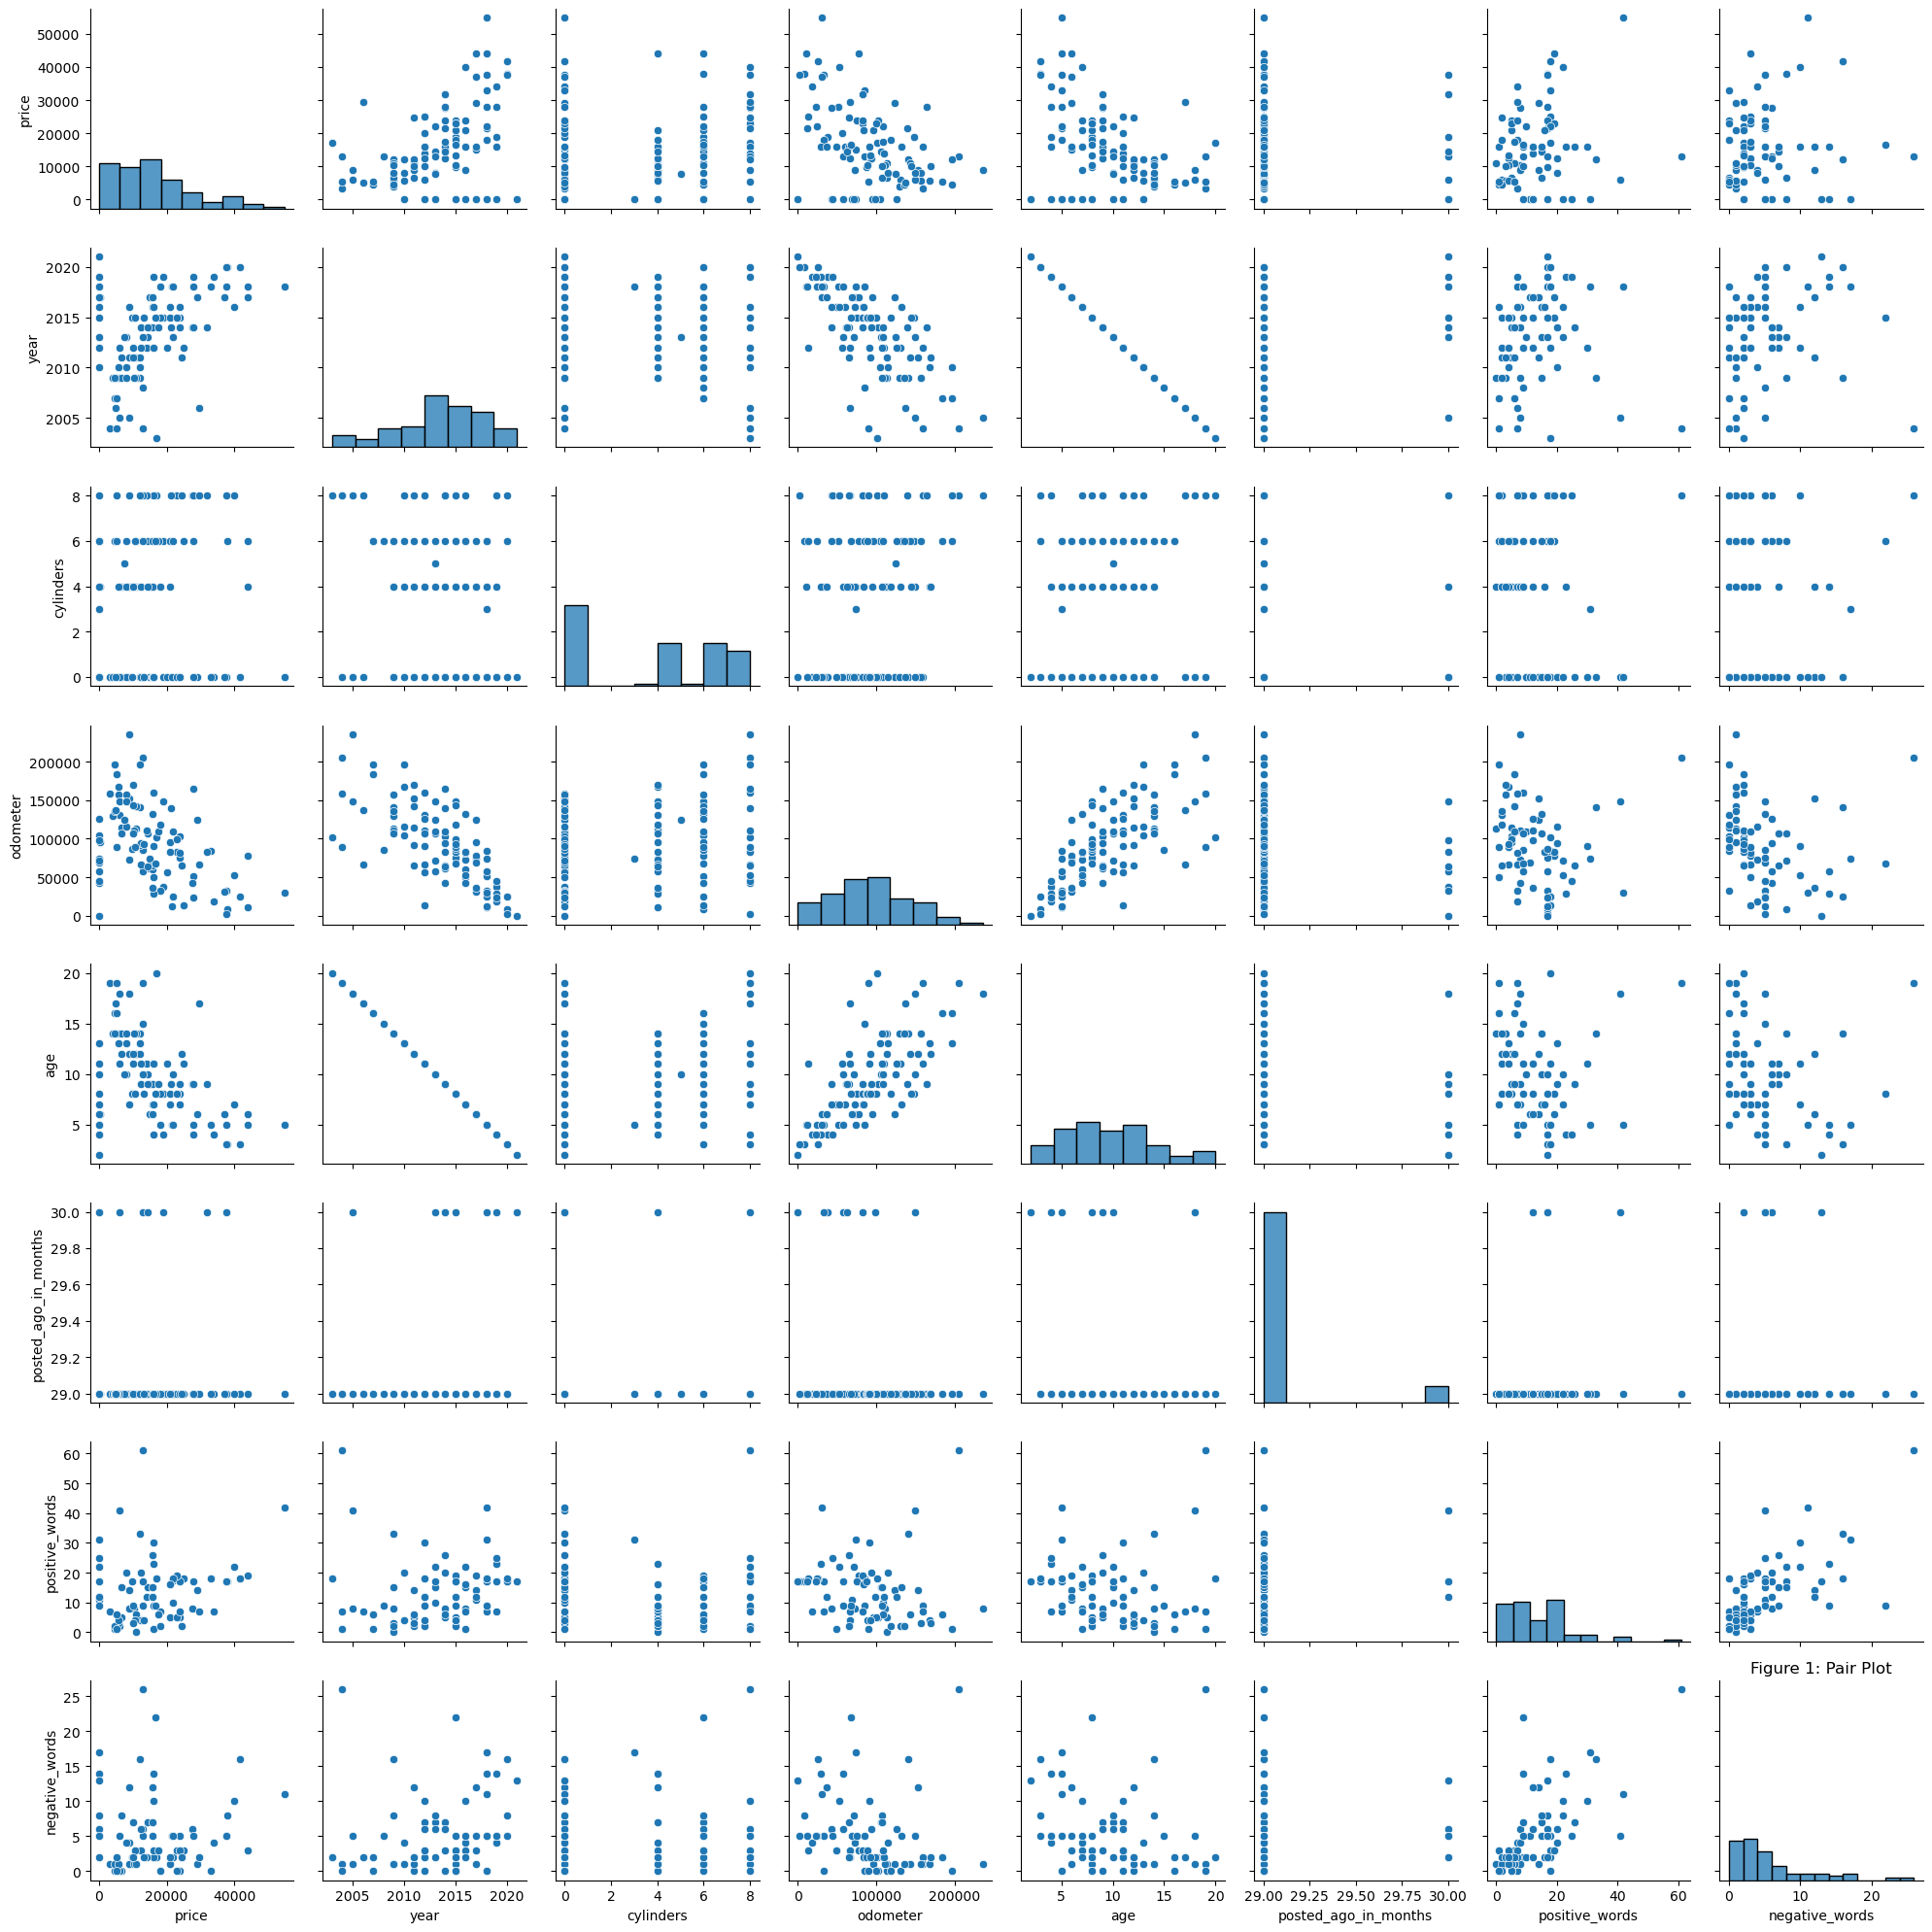

In [88]:
sample_data = new_filtered_df.sample(100)
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

Observations:
* We can see some linear observations between features

<Axes: title={'center': 'Distribution of price'}, xlabel='price', ylabel='Count'>

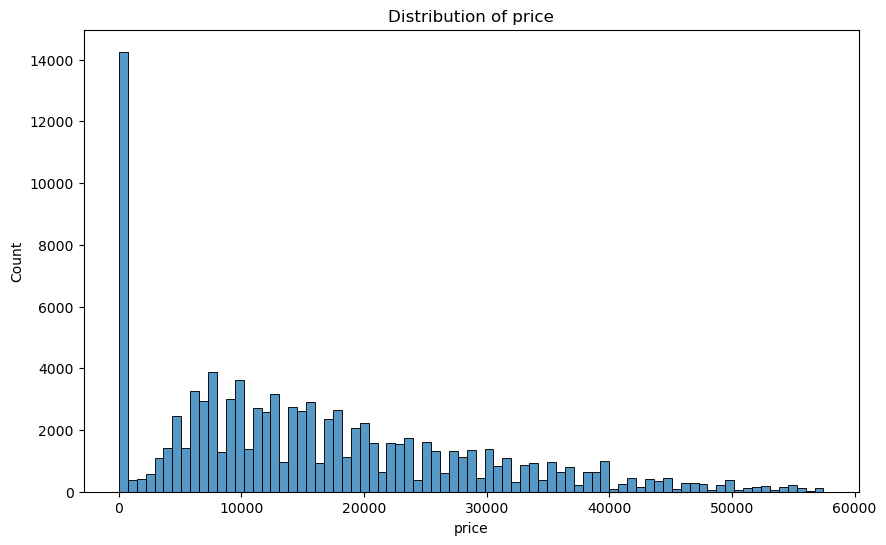

In [89]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of price')
sns.histplot(data=new_filtered_df, x='price')



**Observations:**
*   **The majority of vehicles are priced below \$30,000, with a peak around \$5,000 to \$10,000.**
*   **There are a few vehicles with higher prices, but they are less frequent.**



<Axes: title={'center': 'Plot of Odometer vs car count '}, xlabel='odometer', ylabel='Count'>

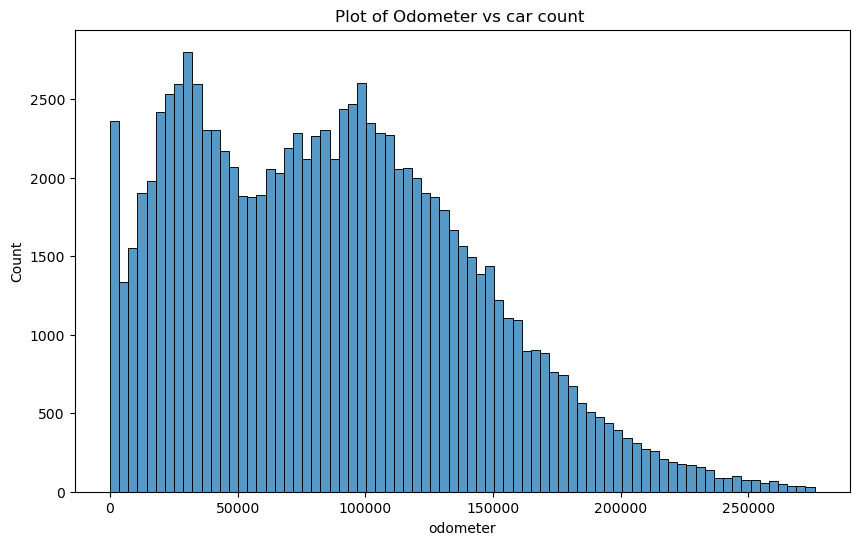

In [90]:
plt.figure(figsize=(10, 6))
plt.title('Plot of Odometer vs car count ')
sns.histplot(data=new_filtered_df, x='odometer')

**Observations**:
*   **Most vehicles have odometer readings below 200,000 miles.**
*   **There's a peak around 20,000 to 40,000 miles, indicating many vehicles with relatively low mileage.**




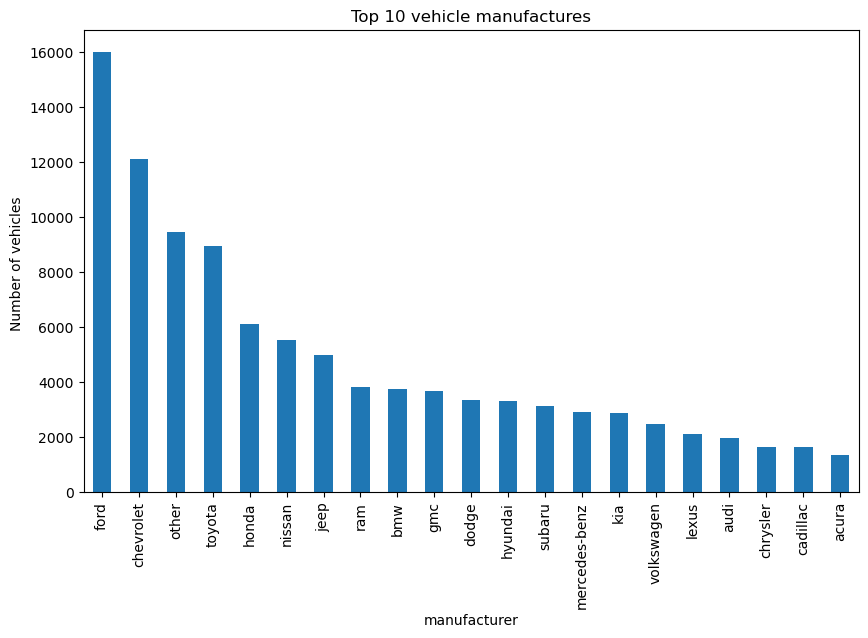

In [91]:
model_counts = new_filtered_df['manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.xlabel('manufacturer')
plt.ylabel('Number of vehicles ')
plt.title('Top 10 vehicle manufactures')
plt.xticks(rotation=90)
plt.show()

**Observation:**


*   **Ford and Chevrolet are the top two manufacturers with the highest number of listings.**
*   **Other manufacturers like Toyota, Honda, and Nissan also have a significant number of listings.**



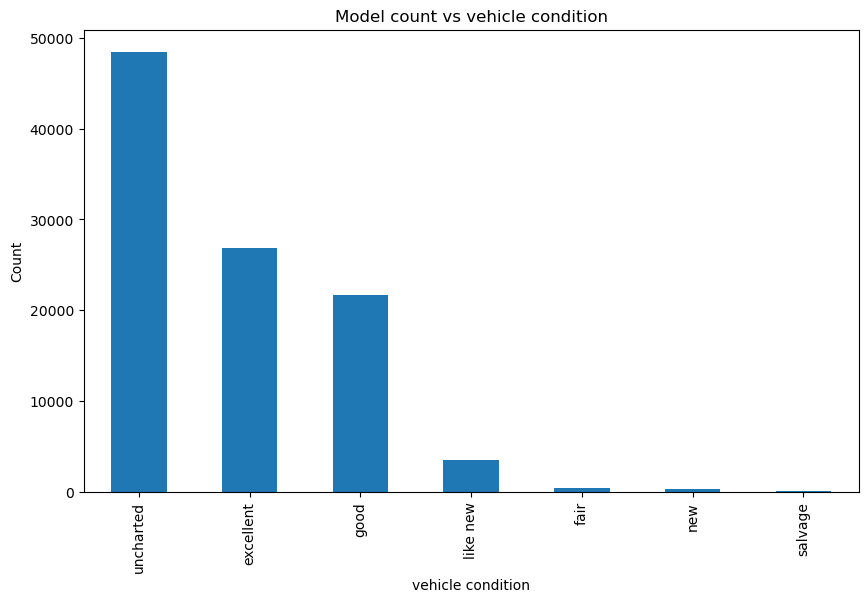

In [92]:
model_counts = new_filtered_df['condition'].value_counts()

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.xlabel('vehicle condition')
plt.ylabel('Count')
plt.title('Model count vs vehicle condition')
plt.xticks(rotation=90)
plt.show()

**Observation**


*   **A significant number of vehicles have an "uncharted" condition.**
*   **Most vehicles are in "excellent" or "good" condition.**
*   **Few vehicles are in "like new", "fair", "new", or "salvage" conditions.**






<Axes: title={'center': 'Price distribution with respect to age of the vehicle'}, xlabel='age', ylabel='price'>

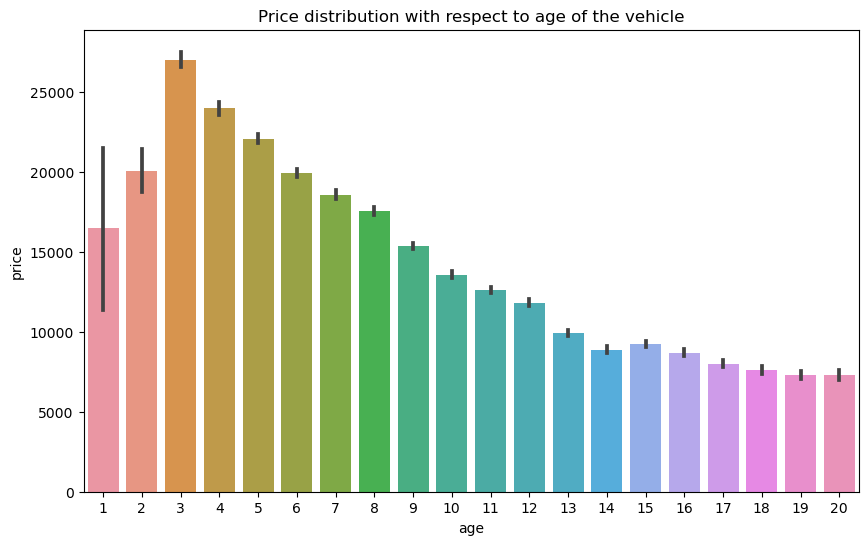

In [93]:
plt.figure(figsize=(10, 6))
plt.title('Price distribution with respect to age of the vehicle')
sns.barplot(data=new_filtered_df,x='age',y='price')

**Observation:**
*   **Age has inverse relation with price. As age increases we can see that price is decreasing.**
*   **price is high for vehicles with age between 3 to 6.**
*   **Vehicles with age less than 3 is suprisingly have less price.**



<Axes: title={'center': 'Price distribution in different fuel types'}, xlabel='fuel', ylabel='price'>

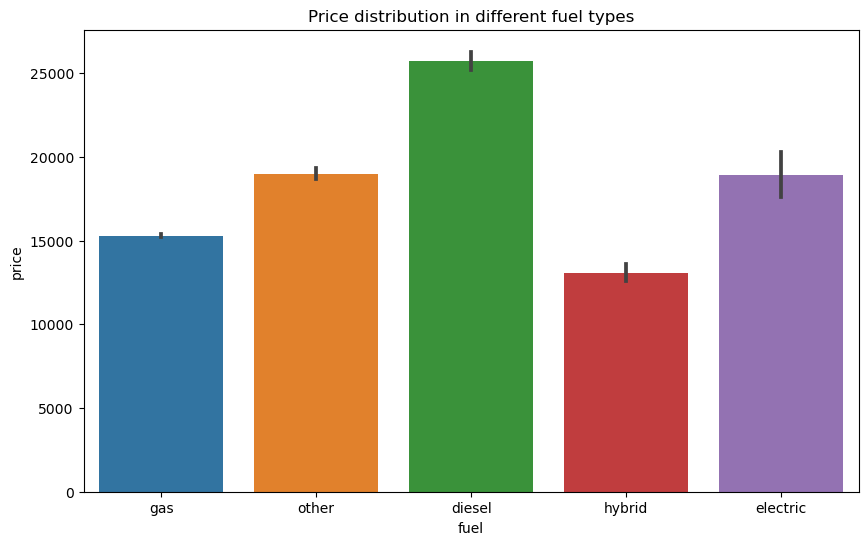

In [94]:
plt.figure(figsize=(10, 6))
plt.title('Price distribution in different fuel types')
sns.barplot(data=new_filtered_df,x='fuel',y='price')

**Observations**

*   **Diesel is high demand fuel type.**
*   **hybrid is havig least demand fuel type.**



<Axes: title={'center': 'Price distribution on different fuel types with hue vehicle condition'}, xlabel='fuel', ylabel='price'>

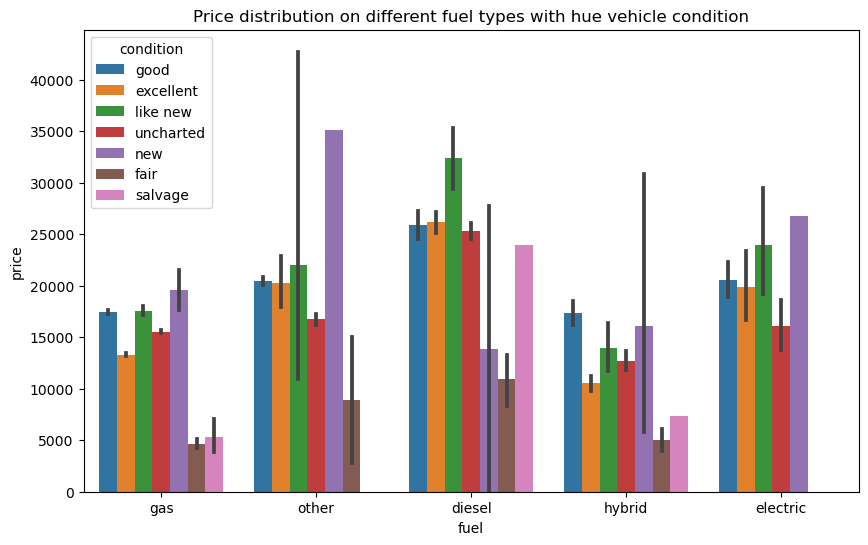

In [95]:
plt.figure(figsize=(10, 6))
plt.title('Price distribution on different fuel types with hue vehicle condition')
sns.barplot(data=new_filtered_df,x='fuel',y='price',hue='condition')

**Observation**:


*   **Across different types of fuels vehicles with condition type fair is having very less price.**
*   **For the diesel fuel type, the new condition vehicles have less demand but in all other fuel types the condition type new is having good demand.**
*   **Like new condition vehicles are having good demand across all the fuel types.**
* **Surpricingly the salage conditin type is showing higher price than fair condition typed vehicles.**



<Axes: title={'center': 'Price distribution in different vehicle sizes'}, xlabel='size', ylabel='price'>

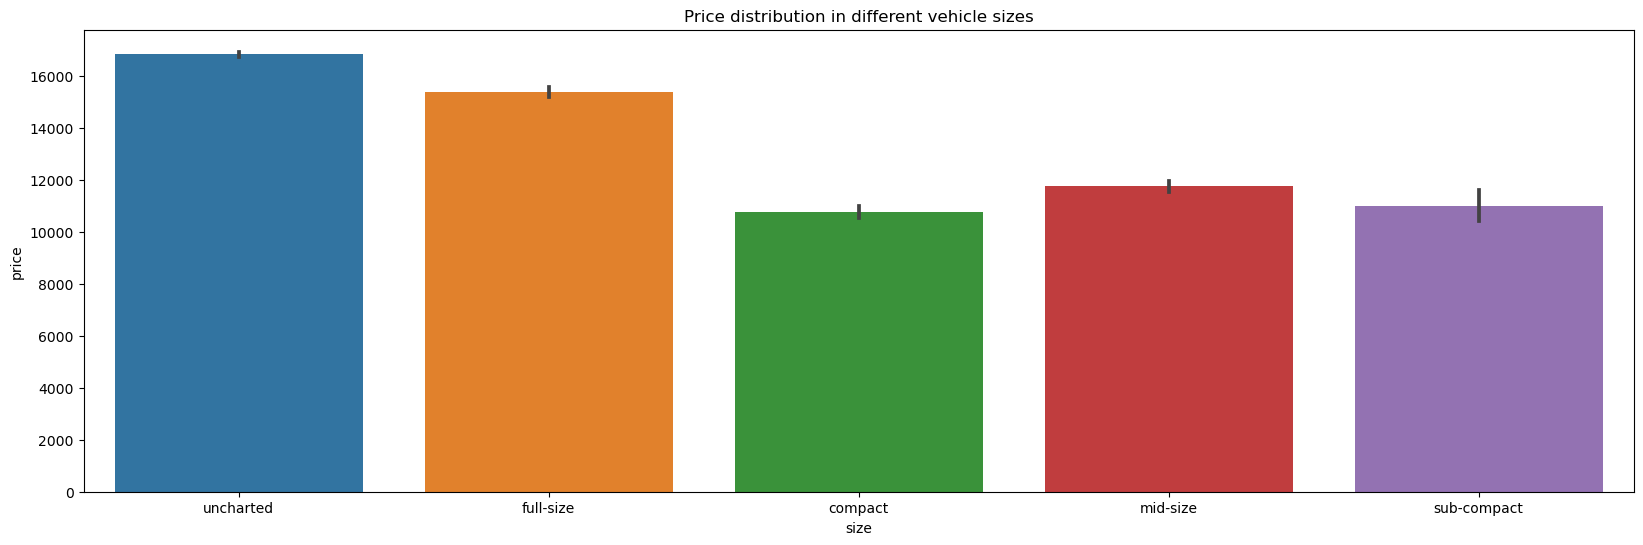

In [96]:
plt.figure(figsize=(20, 6))
plt.title('Price distribution in different vehicle sizes')
sns.barplot(data=new_filtered_df,x='size',y='price')

Observations:


*   In known type of vehicle sizes the full size vehicles are having high price
*   The compact type vehicles have the average price
*   The unknown type uncharted is having higher price among others



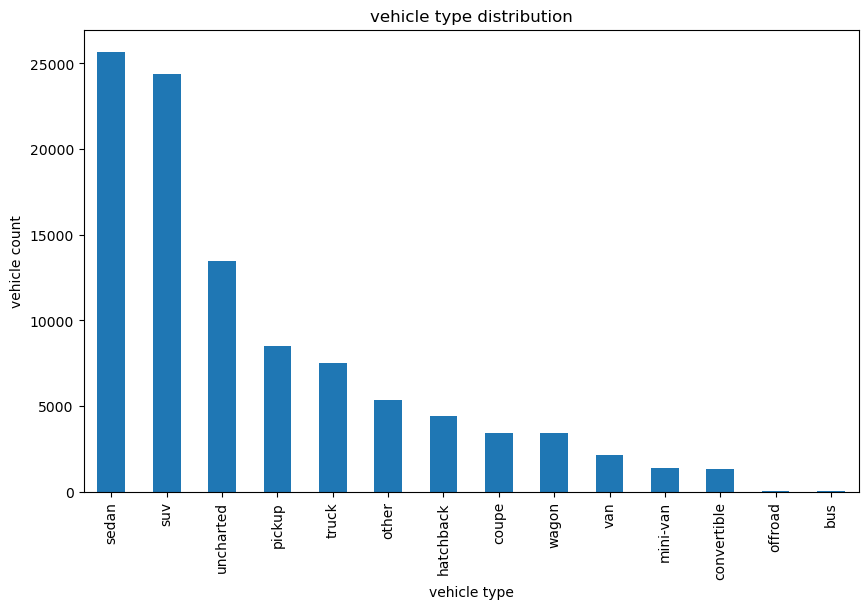

In [97]:
model_counts = new_filtered_df['type'].value_counts()

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.xlabel('vehicle type')
plt.ylabel('vehicle count')
plt.title('vehicle type distribution')
plt.xticks(rotation=90)
plt.show()

Observations:


*   Sedan and suv type are the highest available cars in market
*   Van, mini-van, convertible, offroad and bus are least available for resale in market




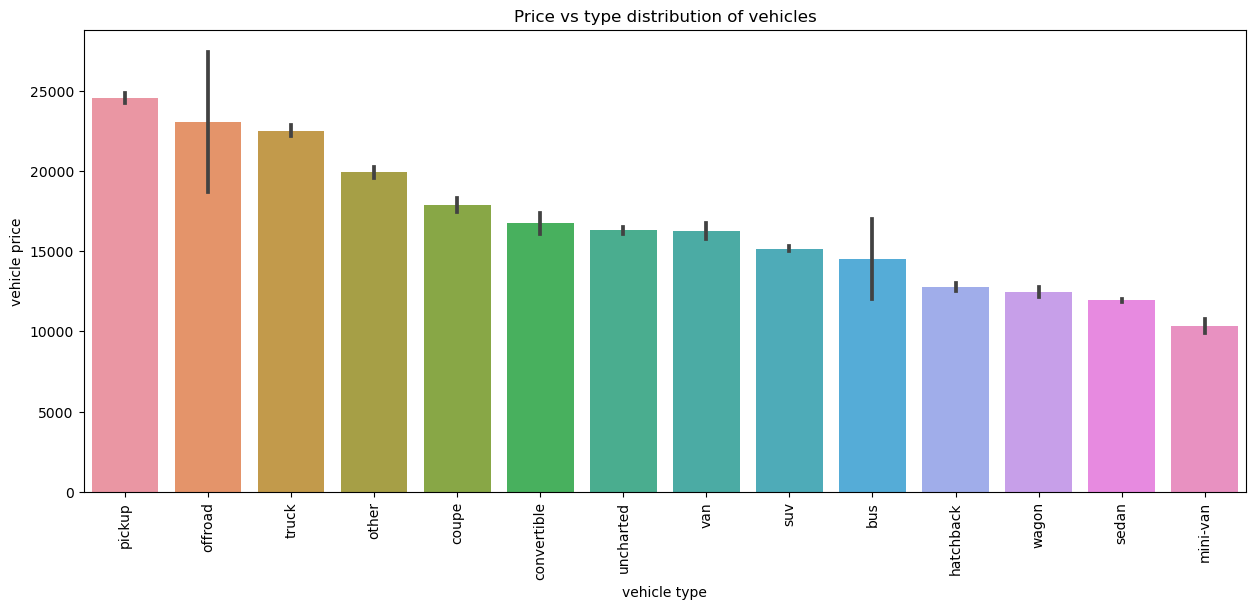

In [98]:
plt.figure(figsize=(15, 6))
sns.barplot(data=new_filtered_df,x='type',y='price',order=new_filtered_df.groupby('type')['price'].mean().sort_values(ascending=False).index)
plt.title('Price vs type distribution of vehicles')
plt.xlabel('vehicle type')
plt.ylabel('vehicle price')
plt.xticks(rotation=90)
plt.show()



*   pickup, offroad and truck vehicle types are expensive, whereas hatchback, wagon, sedan and mini-van are cheap in price.
*   price distribution is almost equal for the remaining vehicle types.



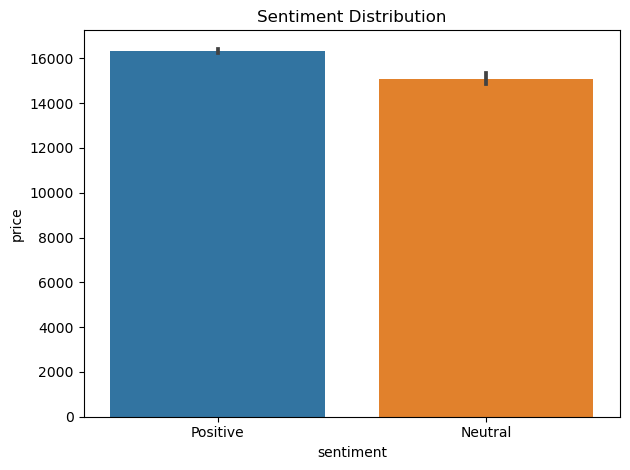

In [101]:
# Sentiment distribution
# plt.subplot(1, 2, 2)
# final_df['sentiment'].value_counts().plot(kind='bar')
sns.barplot(data=new_filtered_df, x='sentiment',y='price')
plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')

plt.tight_layout()
plt.show()

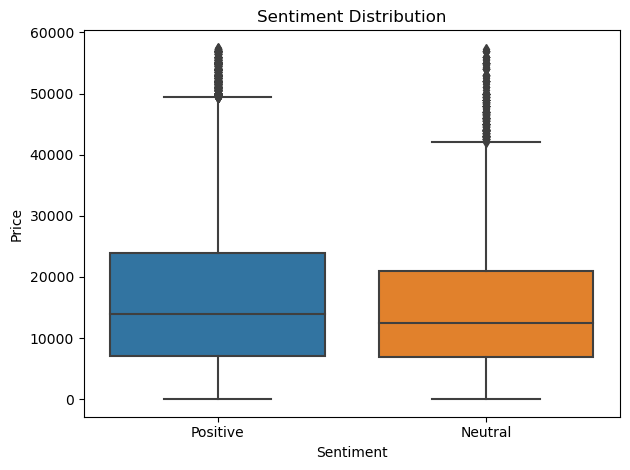

In [102]:
sns.boxplot(data=new_filtered_df, y='price', x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

**Observations**:
*  We can see that vehicles with positive sentimental description is having higher price than neutral one.
*  We can also deduce that there is no vehicle with negative description. It makes sense since no one will give negative description for advertisment for selling vehicle.

/var/folders/by/dkslkp9j0b95hjdnpjh6h6n40000gn/T/ipykernel_39581/745715041.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=new_filtered_df.corr(), annot=True)


<Axes: title={'center': 'Correlation matrix'}>

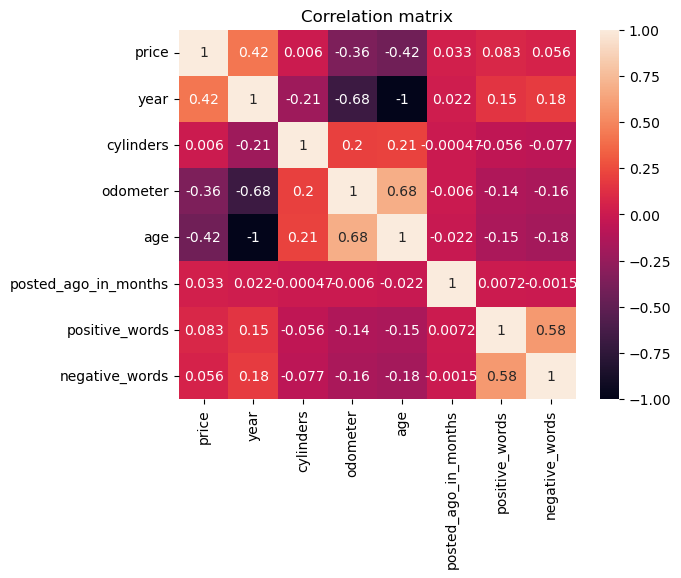

In [103]:
plt.title('Correlation matrix')
sns.heatmap(data=new_filtered_df.corr(), annot=True)



*   price and cylinders negligible correlation. So cylinder type does not affect the price of the vehicle.
*   posted_ago_in_months have almost no correlation with any of the features. So it does not play any role in deciding the price of a vehicle.
*   price and age are inversely proportioanl to each other. As the age of the vehicle increase price of the vehicle decreases.



